In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

In [29]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [24]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


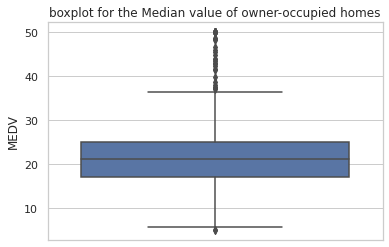

In [40]:
ax = sns.boxplot(y='MEDV', data=boston_df).set_title("boxplot for the Median value of owner-occupied homes")


It shows that the median of "median value of owner-occupied homes" is around 21.Outliers are shown at the top.

Text(0.5, 1.0, 'histogram for the Charles river variable')

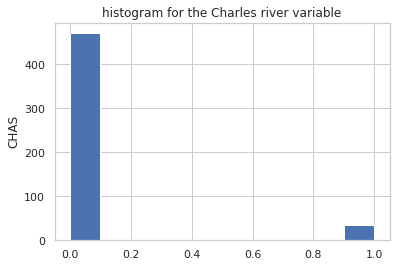

In [47]:
a = boston_df['CHAS'].hist()
a.set_ylabel('CHAS')
a.set_title('histogram for the Charles river variable')


it has a Bi-modal distribution.

Text(0.5, 1.0, 'boxplot for the MEDV variable vs the AGE')

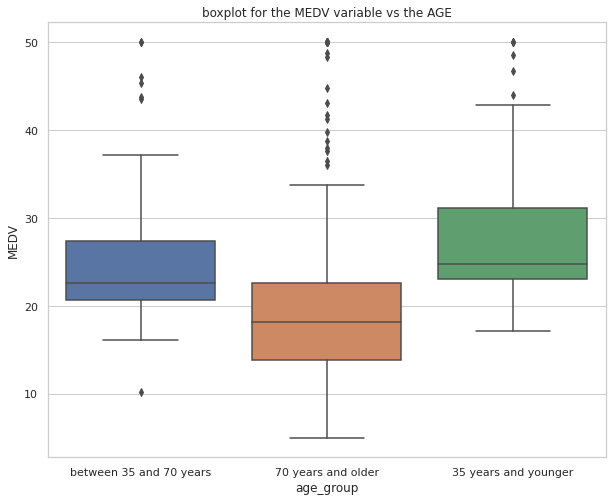

In [59]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

plt.figure(figsize=(10,8))
ax = sns.boxplot(x ='age_group', y='MEDV', data=boston_df)
ax.set_title('boxplot for the MEDV variable vs the AGE')

 It can be infered that the age group of 35 years and younger has highest Median value for MEDV followed by the age group between 35 and 70 year with the age group 70 year and older being the least median for MEDV

Text(0.5, 1.0, 'the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

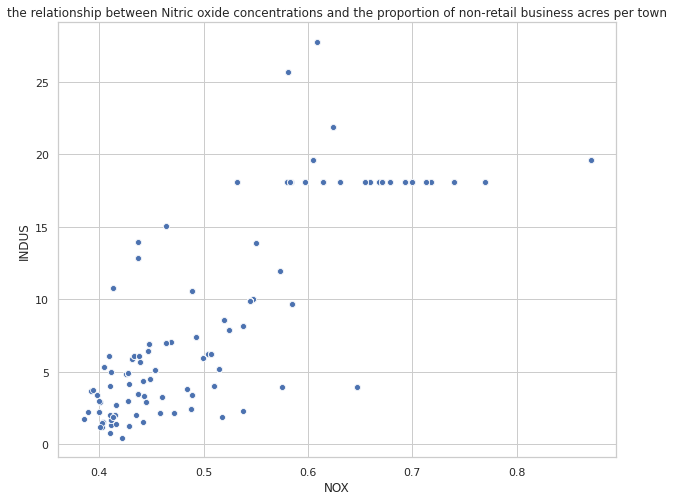

In [62]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = 'NOX', y= 'INDUS',data=boston_df)
ax.set_title('the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

It can be infered from the scatter plot that the more the INDUS increases, so does the NOX increase

Text(0, 0.5, 'PTRATIO')

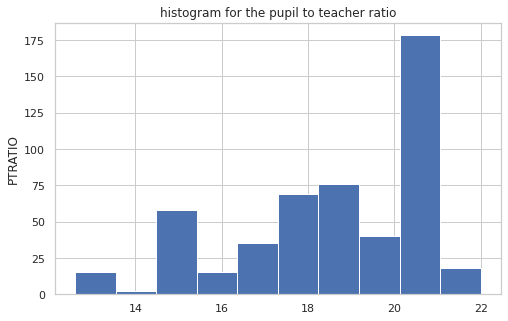

In [57]:
plt.figure(figsize=(8,5))
a = boston_df['PTRATIO'].hist()
a.set_title('histogram for the pupil to teacher ratio')
a.set_ylabel('PTRATIO')

## Is there a significant difference in median value of houses bounded by the Charles river or not?

In [63]:
#we use t_test
import scipy.stats

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

$H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river").

$H_1: µ_1 ≠ µ_2$ 

p value is less than 0.05 so we reject the null hypothesis. It means that there is difference in median value of houses bounded by the Charles river.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 

In [66]:
#we use ANOVA
thirtyFive_lower_eval = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyFive_seventy_eval = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older_eval = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [67]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyFive_lower_eval, thirtyFive_seventy_eval, seventy_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


 $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
 
 $H_1:$ At least one of the means differ
 
 
 Since the p-value is less than 0.05, we will reject the null hypothesis as there is  difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

## an we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

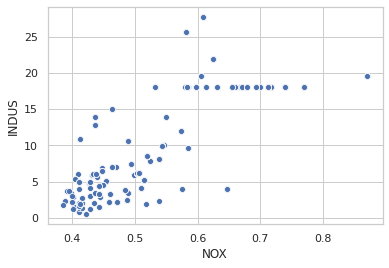

In [68]:
#we use Pearson Correlation
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [69]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS.

In [70]:
#4
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.21e-08
Time:                        14:52:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""